 # <u> Feed Forward Neural Network Approach </u>

# Problem
Predicting the sales price of bulldozers in the future given sales and model data of previously sold bulldozers.

[Blue Book for Bulldozers](https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview)

# Data

 <u>The data for this competition is split into three parts</u>
*   Train.csv is the training set, which contains data through the end of 2011.
*   Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012.
*   Test.csv contains data from May 1, 2012 - November 2012.
* ValidSolution.csv contains SalePrice for Valid.csv

<u>The key fields in train.csv are:</u>

SalesID: the unique identifier of the sale
MachineID: the unique identifier of a machine
saleprice: the price  machine sold for at auction 
saledate: the date of the sale



# Visualizing Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
train_csv = pd.read_csv(r"C:\Users\aser\Desktop\LUMS Fall 2023-24\Machine Learning (New)\Project\Train.csv", low_memory=False)

In [4]:
pd.set_option('display.max_columns', None)
print("The Data: ")
train_csv.head()

The Data: 


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Statistics for numeric data in the training set: ")
train_csv.describe()

Statistics for numeric data in the training set: 


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


# Exploratory data analysis

Dataset shape: (401125, 53),
Target attribute: SalePrices
- We're going to do a data analysis and figure out the relationships between important variables and columns for this problem.

In [6]:
df_eda = train_csv.copy()

Let's First visualize the missing values present in the training data

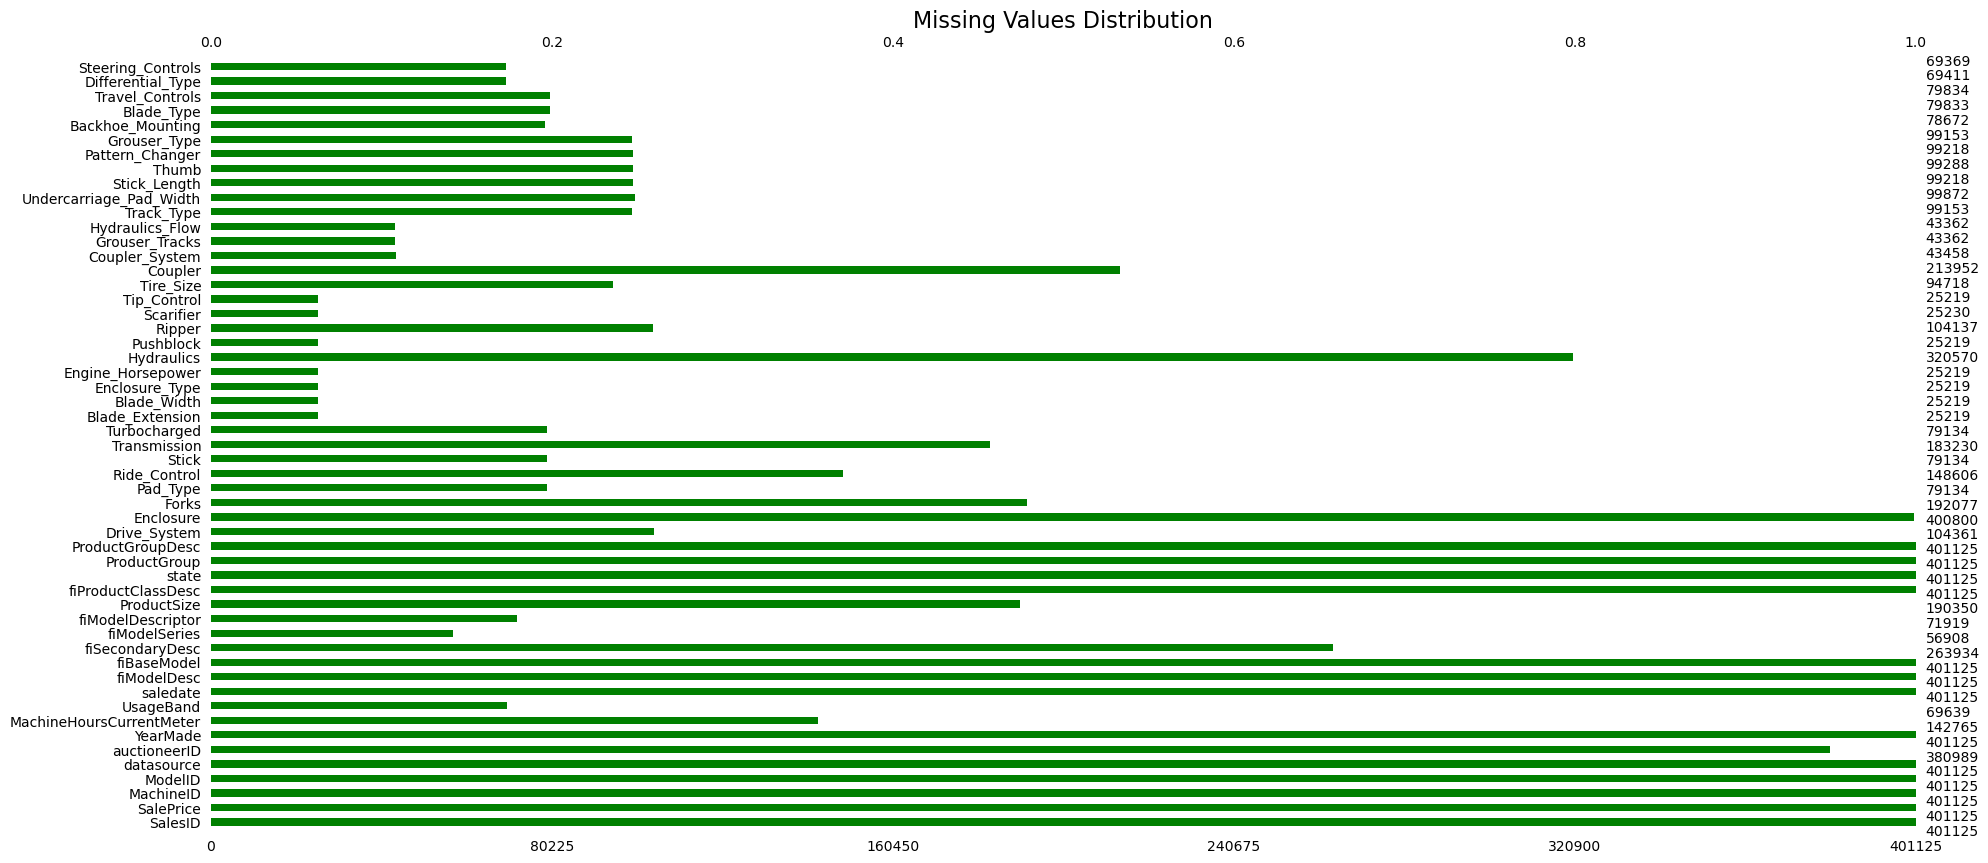

In [7]:
import missingno as msm
plt.figure(figsize=(20, 8))
msm.bar(df_eda, fontsize=10, color = 'green', log=False, figsize=(22, 10))
plt.title('Missing Values Distribution', fontsize=16)
plt.show()

The features in which more than 90% values are NaN:

In [8]:
high_nan_features = [feature for feature in df_eda.columns  if (df_eda[feature].isna().sum()/len(df_eda)) > 0.9]
high_nan_features

['Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Pushblock',
 'Scarifier',
 'Tip_Control']

The Categorical Features List:

In [9]:
categorical_feature_list = [feature for feature in df_eda.columns if feature != 'saledate' and df_eda[feature].dtype == 'O']

for feature in categorical_feature_list:
  print(f'{feature :-<50} {df_eda[feature].nunique()}')

UsageBand----------------------------------------- 3
fiModelDesc--------------------------------------- 4999
fiBaseModel--------------------------------------- 1950
fiSecondaryDesc----------------------------------- 175
fiModelSeries------------------------------------- 122
fiModelDescriptor--------------------------------- 139
ProductSize--------------------------------------- 6
fiProductClassDesc-------------------------------- 74
state--------------------------------------------- 53
ProductGroup-------------------------------------- 6
ProductGroupDesc---------------------------------- 6
Drive_System-------------------------------------- 4
Enclosure----------------------------------------- 6
Forks--------------------------------------------- 2
Pad_Type------------------------------------------ 4
Ride_Control-------------------------------------- 3
Stick--------------------------------------------- 2
Transmission-------------------------------------- 8
Turbocharged--------------------

<b>First it's important to look at the distribution of SalePrice </b>

<Axes: xlabel='SalePrice', ylabel='Count'>

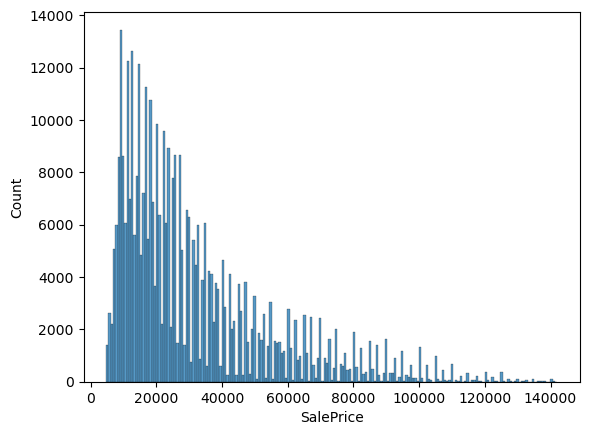

In [10]:
sns.histplot(df_eda['SalePrice'])

<u>There are many errors present in this dataset. 
We also need to deal with missing values and encode the categorical features before inputting the data in our Neural Network.
For this, we're going to follow an extensive procedure of data cleaning and processing.</u>

# <u> Data Cleaning and Preprocessing </u>

In [11]:
df = train_csv.copy()

The saledate data is in the form mm/dd/yyy. This isn't really useful for us so we will process the dates to a better format.

# <b><u> Feature Engineering</u> </b>

- Categorical variables were converted into numerical representations using Label Encoding. This assigns a unique integer to each category within a feature, enabling the model to learn effectively from non-numerical data.

- The initial step involves transforming the 'saledate' feature into separate date-related features such as 'saleYear,' 'saleMonth,' 'saleDay,' 'saleDayOfWeek,' and 'saleDayOfYear.' After this preprocessing, a Label Encoding function, named Ordinal_encoder, is defined to map specific labels in the 'ProductSize' and 'UsageBand' features to numeric values based on a predefined mapping (mask). The 'ProductSize' and 'UsageBand' columns are modified accordingly.

- Next, the code addresses missing values through a custom class named FillMissing. This class contains methods for filling missing values in both categorical and numerical columns. The fill_categorical method fills missing values in string-type columns with the string 'missing,' while the fill_numerical method fills missing values in numeric columns with the median of the column.

- Lastly, a function named nominal_encoder is defined to convert string-type columns into ordered categorical types using the pandas library. The 'label_list' is created to include all columns in the dataset that have an object (string) data type. The nominal_encoder function then converts these string-type columns into ordered categorical types and assigns numerical codes to the categories.

In [12]:
df['saledate'] = pd.to_datetime(df['saledate'])

def date_preprocessing(dataFrame, feature='saledate'):
    dataFrame['saleYear'] = dataFrame[feature].dt.year
    dataFrame['saleMonth'] = dataFrame[feature].dt.month
    dataFrame['saleDay'] = dataFrame[feature].dt.day
    dataFrame['saleDayOfWeek'] = dataFrame[feature].dt.dayofweek
    dataFrame['saleDayOfYear'] = dataFrame[feature].dt.dayofyear
    dataFrame.drop(feature, inplace=True, axis=1)

In [13]:
df.shape

(401125, 53)

In [14]:
date_preprocessing(df)

In [15]:
def Ordinal_encoder (dataFrame, feature_list):
  mask = {'Mini': 1, 'Small': 1, 'Medium': 2, 'Large / Medium': 3,  'Large': 3, 'Low': 1, 'High': 3}
  for label in feature_list:
    dataFrame[label] = dataFrame[label].map(mask)

Ordinal_encoder(df, ['ProductSize', 'UsageBand'])

# <b><u> Handling Missing Values </u></b>

FillMissing is created to handle missing values in a DataFrame. The class has methods for filling missing values in categorical and numerical columns, and there's another function for nominal encoding of string-type columns. An instance of the class is created, and the methods are applied to fill missing values and encode categorical features in the DataFrame. The code promotes a standardized representation of missing data and converts categorical values into a numerical format for further processing.

In [16]:
class FillMissing ():

  def fill_categorical (self,  dataFrame):
    for label, content in  dataFrame.items():
      if pd.api.types.is_string_dtype(content):
         dataFrame[label].fillna('missing', inplace=True)

  def fill_numerical (self,  dataFrame):
    for label, content in  dataFrame.items():
     if pd.api.types.is_numeric_dtype(content):
        dataFrame[label] = content.fillna(content.median())

In [17]:
def nominal_encoder (dataFrame, label_list):

  for label, content in  dataFrame.items():
    if pd.api.types.is_string_dtype(content):
       dataFrame[label] = content.astype('category').cat.as_ordered()
       dataFrame[label] = pd.Categorical(content).codes + 3

In [18]:
fill_missing_value = FillMissing()
fill_missing_value.fill_categorical(df)
fill_missing_value.fill_numerical(df)

In [19]:
label_list = [feature for feature in df.columns if df[feature].dtype == 'O']
nominal_encoder(df, label_list)

# Feature Scaling

Feature scaling is applied to the dataset using the scale_feature function. The purpose of feature scaling is to standardize the range of independent variables or features of the dataset, ensuring that they all contribute equally to the model training process.

In [20]:
def scale_feature (X):
  scaled = StandardScaler().fit_transform(X)
  return scaled

In [21]:
df = df.drop(['SalesID', 'MachineID', 'ModelID', 'auctioneerID'], axis=1)

X_train, y_train = df.drop('SalePrice', axis=1), df['SalePrice']
X_train = scale_feature(X_train)

In [22]:
print(X_train.shape)

(401125, 52)


<u>Now let's do the same for our validation data</u>

In [23]:
X_valid = pd.read_csv(r"C:\Users\aser\Desktop\LUMS Fall 2023-24\Machine Learning (New)\Project\Valid.csv", parse_dates=['saledate'])
y_valid = pd.read_csv(r"C:\Users\aser\Desktop\LUMS Fall 2023-24\Machine Learning (New)\Project\ValidSolution.csv")
y_valid = y_valid['SalePrice']


In [24]:
print(X_valid.shape)

(11573, 52)


In [25]:
X_valid =X_valid.drop(['SalesID', 'MachineID','ModelID','auctioneerID'], axis=1)
date_preprocessing(X_valid)
Ordinal_encoder(X_valid, ['ProductSize', 'UsageBand'])
fill_missing_value.fill_categorical(X_valid)
fill_missing_value.fill_numerical(X_valid)
nominal_encoder(X_valid, label_list)

In [26]:
X_valid = scale_feature(X_valid)

<u>Checking for any NaN or Infinite Values in the Dataset</u>

We are now going to make sure that there no NaN values present in the dataset at all.

In [39]:
print("NaN values in X_train:", np.isnan(X_train).any())
print("NaN values in X_valid:", np.isnan(X_valid).any())
print("NaN values in y_train:", np.isnan(y_train).any())
print("NaN values in y_valid:", np.isnan(y_valid).any())

print("Infinite values in X_train:", np.isinf(X_train).any())
print("Infinite values in X_valid:", np.isinf(X_valid).any())
print("Infinite values in y_train:", np.isinf(y_train).any())
print("Infinite values in y_valid:", np.isinf(y_valid).any())

NaN values in X_train: False
NaN values in X_valid: False
NaN values in y_train: False
NaN values in y_valid: False
Infinite values in X_train: False
Infinite values in X_valid: False
Infinite values in y_train: False
Infinite values in y_valid: False


# Neural Network

Now that we have processed our data and removed any missing values, we can start training it. We are going to make a Feed Forward Neural Network (FNN) using TensorFlow and Keras for a regression task. The neural network architecture consists of several dense layers with ReLU activation functions, batch normalization, and dropout layers to prevent overfitting. The model is compiled using the Adam optimizer, mean squared error (mse) loss function, and mse as the evaluation metric.

Here's a general breakdown of the architecture:

- Input layer: Flatten layer with an input shape of 52.
- Hidden layers: Several dense layers with decreasing units (256, 128, 64, 32, 16), each followed by batch normalization and dropout for regularization.
- Output layer: Dense layer with 1 unit, representing the regression outpu


In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten,  BatchNormalization, Dropout
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [72]:
FNN = tf.keras.models.Sequential([
    Flatten(input_shape=[52]),
    Dense(256, activation='relu', kernel_initializer='lecun_normal'),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_initializer='lecun_normal'),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_initializer='lecun_normal'),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_initializer='lecun_normal'),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_initializer='lecun_normal'),
    Dropout(0.5),
    Dense(1)
])

In [73]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [75]:
FNN.compile(optimizer='adam', loss='mse', metrics=['mse'])
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model.h5', save_best_only=True)

In [76]:
X_train.shape

(401125, 52)

In [77]:
history = FNN.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    batch_size=20,
    callbacks=[early_stopping, model_checkpoint],
    steps_per_epoch=len(X_train) // 10,
    validation_steps=len(X_valid) // 10
)

Epoch 1/50
40112/40112 [==============================] - 222s 5ms/step - loss: 431750528.0000 - mse: 431750528.0000 - val_loss: 344933536.0000 - val_mse: 344933536.0000
Epoch 2/50
    4/40112 [..............................] - ETA: 13:44 - loss: 360736672.0000 - mse: 360736672.0000

C:\Users\aser\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40112/40112 [==============================] - 215s 5ms/step - loss: 368288896.0000 - mse: 368288896.0000
Epoch 3/50
40112/40112 [==============================] - 215s 5ms/step - loss: 342228032.0000 - mse: 342228032.0000
Epoch 4/50
40112/40112 [==============================] - 215s 5ms/step - loss: 326052960.0000 - mse: 326052960.0000
Epoch 5/50
40112/40112 [==============================] - 216s 5ms/step - loss: 314712896.0000 - mse: 314712896.0000
Epoch 6/50
40112/40112 [==============================] - 216s 5ms/step - loss: 308692000.0000 - mse: 308692000.0000
Epoch 7/50
40112/40112 [==============================] - 215s 5ms/step - loss: 305498752.0000 - mse: 305498720.0000
Epoch 8/50
40112/40112 [==============================] - 217s 5ms/step - loss: 301780256.0000 - mse: 301780256.0000
Epoch 9/50
40112/40112 [==============================] - 216s 5ms/step - loss: 298312416.0000 - mse: 298312416.0000
Epoch 10/50
40112/40112 [==============================] - 217s 5ms/step - 

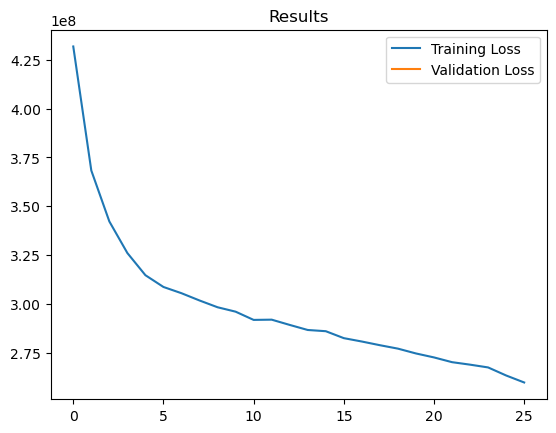

In [78]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Results")
plt.legend();

Now we are ready to make predictions

In [79]:
def evaluate_FNN (X_train, y_train, X_valid, y_valid):
    y_train_pred = FNN.predict(X_train)
    y_valid_pred = FNN.predict(X_valid)

    
    return {
          'MSE_train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
          'MSLE_train':np.sqrt( mean_squared_log_error(y_train, y_train_pred)),
          'MSE_valid': np.sqrt(mean_squared_error(y_valid, y_valid_pred)),
          'MSLE_valid': np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
    }

In [80]:
evaluate_FNN(X_train, y_train, X_valid, y_valid)

362/362 [==============================] - 1s 3ms/step


{'MSE_train': 10978.835412180459,
 'MSLE_train': 0.31205375626446213,
 'MSE_valid': 13442.321950632051,
 'MSLE_valid': 0.35683082017715423}

<b>R2 Score</b>

In [94]:
from sklearn.metrics import r2_score

y_valid_pred = FNN.predict(X_valid)

r2_valid = r2_score(y_valid, y_valid_pred)

print(f'R2 score on the validation set: {r2_valid:.4f}')

362/362 [==============================] - 1s 3ms/step
R2 score on the validation set: 0.7369


<b>Preparing Test Data</b>

Now that our model has been trained, we are going to process our test data and make predictions.

In [81]:
testset =  pd.read_csv(r"C:\Users\aser\Desktop\LUMS Fall 2023-24\Machine Learning (New)\Project\Test.csv", parse_dates=['saledate'])

In [82]:
X_test = testset.drop(['SalesID', 'MachineID','ModelID','auctioneerID'], axis=1)

In [83]:
date_preprocessing(X_test)
Ordinal_encoder(X_test, ['ProductSize', 'UsageBand'])
fill_missing_value.fill_categorical(X_test)
fill_missing_value.fill_numerical(X_test)
nominal_encoder(X_test, label_list)

In [84]:
X_test = scale_feature(X_test)

In [88]:
X_test_predict = FNN.predict(X_test)

390/390 [==============================] - 1s 3ms/step


In [89]:
prediction = pd.DataFrame()
prediction['SalesID'] = testset['SalesID']
prediction['SalePrice']= X_test_predict

In [90]:
prediction

,SalesID,SalePrice
0,1227829,32929.863281
1,1227844,17415.957031
2,1227847,86546.593750
3,1227848,120422.937500
4,1227863,76974.117188
...,...,...
12452,6643171,47606.855469
12453,6643173,48933.449219
12454,6643184,11727.343750
12455,6643186,36983.511719
